# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## План (инструкция) по выполнению проекта

### Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет

### Шаг 2. Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?



### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?



### Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
- Поясните:
 Как вы сформулировали нулевую и альтернативную гипотезы;
 Какой критерий применили для проверки гипотез и почему.



### Шаг 6. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.




### Этап 1. Откроем файл с данными и изучим общую информацию

#### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг - компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st
import seaborn as sns

In [2]:
# !pip3 install tqdm
# !pip3 install ipywidgets
from tqdm.auto import tqdm

In [3]:
# читаем данные    
local = False
if local:
    df = pd.read_csv('./datasets/games.csv')
else:
    url = "https://drive.google.com/file/d/1rSAMPUP2T2Z21IOaClmgMd3jxPermdYd/view?usp=sharing"
    path = 'https://drive.google.com/uc?export=download&id='+ url.split('/')[-2]
    df = pd.read_csv(path)

In [4]:
df.columns = df.columns.str.lower()

In [5]:
# смотрим
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [167]:
# случайная выборка - выполняем ячейку несколько раз
df.sample(5,random_state=1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E


In [168]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видно, что имеются пропуски в датасет. Оценим количество пропусков.

In [169]:
# оценим количество NaN в разных колонках
def print_сolumns_with_nan(dataframe):
    series_nan =  dataframe.isnull().sum().sort_values()
    have_nan = False
    for column in series_nan.index:
        if series_nan[column]==0:
            continue
        try:    
            print('{:<20}| NaN = {:<7}| {:^10.1%}'.format(column,series_nan[column],series_nan[column]/dataframe.shape[0]))
            have_nan = True
        except:
            print("деление на 0") 
    if not have_nan:
        print('Нет данных с NaN!')


In [170]:
# печатаем колонки с пропусками
print_сolumns_with_nan(df)

name                | NaN = 2      |    0.0%   
genre               | NaN = 2      |    0.0%   
year_of_release     | NaN = 269    |    1.6%   
user_score          | NaN = 6701   |   40.1%   
rating              | NaN = 6766   |   40.5%   
critic_score        | NaN = 8578   |   51.3%   


Строки с отсутсвующим назаванием игры и жанром заменим на 'noname' 

In [171]:
df['name'] = df['name'].fillna('noname')
df['genre'] = df['genre'].fillna('genre')

Оценим общее количество созданных игр.

In [172]:
print('Всего различных игр = {}'.format(len(df['name'].unique())))
print('Одинаковые игры составляют {:.2%} от всех имеющихся.'.format(1 - len(df['name'].unique())/df.shape[0]))
#df.shape[0]

Всего различных игр = 11560
Одинаковые игры составляют 30.84% от всех имеющихся.


Приведем название игр к нижнему регистру. Возможно некорректное написание

In [173]:
df['name'] = df.apply(lambda row: row['name'].lower(),axis=1)

In [174]:
# смотрим количество уникальных значений по названиям игр
len(df['name'].unique())

11560

Так, как размер списка уникальных значений с названиями игр не изменился - то можно сделать вывод, что одни и те же игры выпускаются на различных платформах.

In [175]:
# оценим корректность написания названий платформ
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

*С написанием названий платформ всё в порядке.*

In [176]:
# оценим корректность написания названий жанров
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'genre'], dtype=object)

In [177]:
len(df['genre'].unique())

13

*С написанием названий жанров всё в порядке. Самих жанров, как таковых, немного = 13*

Разберемся с годом выпуска релиза. Пропуски заполним значением 1900. И преобразуем к типу int.

In [178]:
df['year_of_release'] = df['year_of_release'].fillna(1900)
df['year_of_release'] = df['year_of_release'].astype('int')

Добавим колонку с типом дата. Вдруг понадобиться.

In [179]:
df['date_of_release'] = df.apply(lambda raw: str(raw['year_of_release'])+'-01-01', axis=1)
df['date_of_release'] = pd.to_datetime(df['date_of_release'], format='%Y-%m-%d') #.dt.year
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,date_of_release
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006-01-01
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-01-01
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009-01-01
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01


Рассмотрим колонку рейтинга 'user_score'

In [180]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Так как мы не знаем причину отсутствия рейтинга, заменим nan на необычное значение -1.

In [181]:
df['user_score'] = df['user_score'].fillna(-1)

Посмотрим на какой-то странный 'tbd'. Странный он - потому, что рейтинг похоже оценивается по шкале от 0 до 10.

In [182]:
tbd = 'tbd'
df_tbd = df.query('user_score == @tbd')

In [183]:
df_tbd.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,date_of_release
119,zumba fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,2010-01-01
301,namco museum: 50th anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+,2005-01-01
520,zumba fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T,2011-01-01
645,udraw studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E,2010-01-01
657,frogger's adventures: temple of the frog,GBA,1900,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,1900-01-01
718,just dance kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E,2010-01-01
726,dance dance revolution x2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+,2009-01-01
821,the incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E,2004-01-01
881,who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E,1999-01-01
1047,tetris worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E,2001-01-01


Выбрасывать данные строки не будем, чтобы не потерять данные по продажам. Заменим 'tbd' на -1, чтобы не смешать данные с нулевым рейтингом. И запомним это обстоятельство.

In [184]:
df['user_score']=df['user_score'].replace('tbd',-1)

In [185]:
# смотрим
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Не нравиться тип 'object'. Преобразуем сначала к float, затем умножим на 10 (чтобы не потерять оценку) и затем преобразуем к  int.

In [186]:
df['user_score'] = df.apply(lambda raw: 10*float(raw['user_score']),axis=1)

In [187]:
df['user_score'] = df['user_score'].astype('int')

Смотрим на колонку 'critic_score'.

In [188]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Так как мы не знаем причину отсутствия рейтинга, заменим nan на необычное значение -10.

In [189]:
df['critic_score'] = df['critic_score'].fillna(-10)

In [190]:
#преобразуем к типу int
df['critic_score']=df['critic_score'].astype('int')

Смотрим 'rating'.

In [191]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [192]:
print_сolumns_with_nan(df)

rating              | NaN = 6766   |   40.5%   


Заменим NaN в рейтинге на 'NORATING'. таких строк слишком много (40%), чтобы их просто удалить.

In [193]:
df['rating']=df['rating'].fillna('no_rating')

In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16715.0,2004.770924,14.612996,1900.0,2003.0,2007.00,2010.00,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,16715.0,28.442118,40.651556,-10.0,-10.0,-10.00,70.00,98.00
user_score,16715.0,26.894466,41.698332,-10.0,-10.0,-10.00,73.00,97.00


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null int64
rating             16715 non-null object
date_of_release    16715 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


Преобразуем колонки с продажами к int (предварительно домножив на 1 000 000)

In [196]:
for column in ['na_sales','eu_sales','jp_sales', 'other_sales']:
    df[column] = df[column]*1000000
    df[column] = df[column].astype('int64')

In [197]:
df['all_sales'] = df['na_sales'] + df['eu_sales']  + df['jp_sales'] + df['other_sales']
df['all_sales'] = df['all_sales'].astype('int64')

In [198]:
print_сolumns_with_nan(df)

Нет данных с NaN!


In [199]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,date_of_release,all_sales
0,wii sports,Wii,2006,Sports,41360000,28960000,3770000,8450000,76,80,E,2006-01-01,82540000
1,super mario bros.,NES,1985,Platform,29080000,3580000,6810000,770000,-10,-10,no_rating,1985-01-01,40240000
2,mario kart wii,Wii,2008,Racing,15680000,12760000,3790000,3290000,82,83,E,2008-01-01,35520000
3,wii sports resort,Wii,2009,Sports,15610000,10930000,3280000,2950000,80,80,E,2009-01-01,32770000
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11270000,8890000,10220000,1000000,-10,-10,no_rating,1996-01-01,31380000


In [200]:
df['user_score'].unique()

array([ 80, -10,  83,  85,  66,  84,  86,  77,  63,  74,  82,  90,  79,
        81,  87,  71,  34,  53,  48,  32,  89,  64,  78,  75,  26,  72,
        92,  70,  73,  43,  76,  57,  50,  91,  65,  88,  69,  94,  68,
        61,  67,  54,  40,  49,  45,  93,  62,  42,  60,  37,  41,  58,
        56,  55,  44,  46,  59,  39,  31,  29,  52,  33,  47,  51,  35,
        25,  19,  30,  27,  22,  20,  95,  21,  36,  28,  18,  38,   0,
        16,  96,  24,  17,  11,   3,  15,   7,  12,  23,   5,  13,   2,
         6,  14,   9,  10,  97])

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null int64
eu_sales           16715 non-null int64
jp_sales           16715 non-null int64
other_sales        16715 non-null int64
critic_score       16715 non-null int64
user_score         16715 non-null int64
rating             16715 non-null object
date_of_release    16715 non-null datetime64[ns]
all_sales          16715 non-null int64
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 1.7+ MB


In [202]:
# колонки с ограниченным количеством уникальных значение - > category
df['platform'] = df['platform'].astype('category')
df['genre'] = df['genre'].astype('category')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
name               16715 non-null object
platform           16715 non-null category
year_of_release    16715 non-null int64
genre              16715 non-null category
na_sales           16715 non-null int64
eu_sales           16715 non-null int64
jp_sales           16715 non-null int64
other_sales        16715 non-null int64
critic_score       16715 non-null int64
user_score         16715 non-null int64
rating             16715 non-null object
date_of_release    16715 non-null datetime64[ns]
all_sales          16715 non-null int64
dtypes: category(2), datetime64[ns](1), int64(8), object(2)
memory usage: 1.4+ MB


In [204]:
df.duplicated().sum()

0

**Вывод: Датасет подготовлен к дальнейшим исследованиям.**

### Этап 3. Проведём исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

''

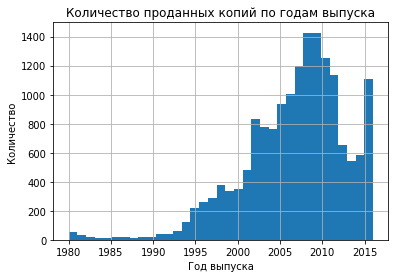

In [205]:
# срез данных. Помним, что nan был замененн на 1900 год
df_query = df.query('not year_of_release == 1900')
df_query['year_of_release'].hist(bins=35);
plt.title('Количество проданных копий по годам выпуска')
plt.ylabel('Количество')
plt.xlabel('Год выпуска')
;

**Причины приведшие, в прошлом, к росту нужно искать с 2000 по 2010 год. Далее идет спад в количестве выпущенных игр. Рынок игр непрерывно падает с 2008 года**
<!-- 
**Выборки данных можно ограничить периодом с 2000 по 2016 год.** -->

#### Посмотрим на количество проданных копий по годам выпуска.

''

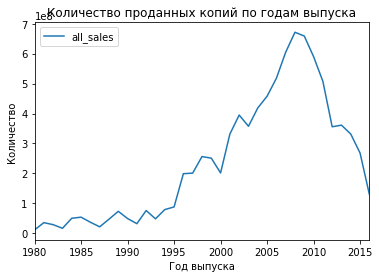

In [206]:
df_year = df_query.groupby('year_of_release').agg({'all_sales':'sum'})
df_year.plot(legend = 'all_sales ')
plt.title('Количество проданных копий по годам выпуска')
plt.ylabel('Количество')
plt.xlabel('Год выпуска')
;

In [207]:
# # оценим динамику изменения в % начиная с точки падения 2000 года
year_list = df_year.index.tolist()
year_list.sort()

for y in year_list: 
    if year_list.index(y)==len(year_list)-1 or y < 2000:
        continue
    count1 = df_year.loc[df_year.index==y]['all_sales'].tolist()[0]
    count2 = df_year.loc[df_year.index==y+1]['all_sales'].tolist()[0]
    print('Ежегодный прирост в {}  = {:.1%} '.format(y+1, 1 - count1/count2))
    

Ежегодный прирост в 2001  = 39.2% 
Ежегодный прирост в 2002  = 16.1% 
Ежегодный прирост в 2003  = -10.5% 
Ежегодный прирост в 2004  = 14.6% 
Ежегодный прирост в 2005  = 8.5% 
Ежегодный прирост в 2006  = 11.6% 
Ежегодный прирост в 2007  = 14.4% 
Ежегодный прирост в 2008  = 9.9% 
Ежегодный прирост в 2009  = -1.9% 
Ежегодный прирост в 2010  = -11.6% 
Ежегодный прирост в 2011  = -16.3% 
Ежегодный прирост в 2012  = -42.6% 
Ежегодный прирост в 2013  = 1.5% 
Ежегодный прирост в 2014  = -9.0% 
Ежегодный прирост в 2015  = -23.7% 
Ежегодный прирост в 2016  = -106.2% 


**Вывод: Рынок непрерывно падает начиная с 2009 года**

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [208]:
# построим сводную таблицу
popular_platform=df.groupby('platform').agg({'all_sales':'sum'}).sort_values(by='all_sales',ascending=False).head(10)
popular_platform['ratio'] = popular_platform['all_sales']/popular_platform['all_sales'].sum()
display(popular_platform)

# запомним смисок топ-10
list_of_top_popular_platform = popular_platform.index.tolist()
#list_of_top_popular_platform

,all_sales,ratio
platform,,
PS2,1255769992,0.184757
X360,971419999,0.142921
PS3,939649995,0.138247
Wii,907509997,0.133518
DS,806120000,0.118601
PS,730859994,0.107529
GBA,317849999,0.046764
PS4,314139997,0.046218
PSP,294050000,0.043262


Построим графики зависимости количества копий от платформы.

''

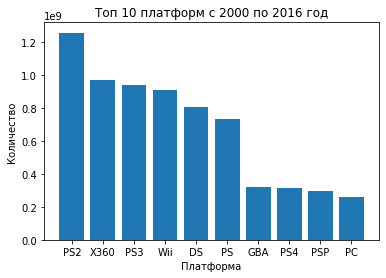

In [209]:
names = popular_platform.index
values = popular_platform['all_sales']

plt.bar(names, values)
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.title('Топ 10 платформ с 2000 по 2016 год')
;

Выполним срез данных с 2000 по 2016 год. По наиболее успешным платформам.

In [210]:
# отберем данные
df_popular_platform_2000_2016 = df.query('platform in (@list_of_top_popular_platform)')
df_popular_platform_2000_2016 = df_popular_platform_2000_2016.query('2000 <= year_of_release and year_of_release <= 2016')
df_popular_platform_2000_2016.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,date_of_release,all_sales
0,wii sports,Wii,2006,Sports,41360000,28960000,3770000,8450000,76,80,E,2006-01-01,82540000
2,mario kart wii,Wii,2008,Racing,15680000,12760000,3790000,3290000,82,83,E,2008-01-01,35520000
3,wii sports resort,Wii,2009,Sports,15610000,10930000,3280000,2950000,80,80,E,2009-01-01,32770000
6,new super mario bros.,DS,2006,Platform,11280000,9140000,6500000,2880000,89,85,E,2006-01-01,29800000
7,wii play,Wii,2006,Misc,13960000,9180000,2930000,2840000,58,66,E,2006-01-01,28910000


In [211]:
# построим сводную таблицу
pivot = df_popular_platform_2000_2016.pivot_table(index = 'platform', columns='year_of_release',values = 'all_sales', aggfunc = 'sum')
pivot.fillna(0)
pivot

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,17270000.0,130140000.0,119810000.0,146940000.0,145310000.0,119540000.0,85020000.0,26180000.0,11010000.0,1540000.0,NaN,NaN,NaN
GBA,70000.0,61529999.0,74160000.0,56670000.0,77910000.0,33860000.0,5280000.0,3400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,4660000.0,5470000.0,8569999.0,8840000.0,10390000.0,4370000.0,2850000.0,9280000.0,12420000.0,16910000.0,24280000.0,35030000.0,23220000.0,12380000.0,13280000.0,8520000.0,5250000.0
PS,96369998.0,35590000.0,6670000.0,2070000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,39170000.0,166429996.0,205380000.0,184310000.0,211809998.0,160659999.0,103420000.0,75990000.0,53899999.0,26400000.0,5640000.0,450000.0,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,20960000.0,73190000.0,118520000.0,130929998.0,142170000.0,156779999.0,107360000.0,113249999.0,47759999.0,16820000.0,3600000.0
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25990000.0,99999998.0,118899999.0,69250000.0
PSP,NaN,NaN,NaN,NaN,7060000.0,43840000.0,55320000.0,46930000.0,34550000.0,37780000.0,35040000.0,17820000.0,7690000.0,3140000.0,240000.0,120000.0,NaN
Wii,NaN,NaN,NaN,NaN,NaN,NaN,137150000.0,152769999.0,171320000.0,206969999.0,127950000.0,59649999.0,21710000.0,8590000.0,3750000.0,1140000.0,180000.0


In [212]:
list_of_top_popular_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [213]:
pivot = pivot.query('index in (@list_of_top_popular_platform)')
pivot = pivot.fillna(0)
pivot_T = pivot.T
pivot_T.style.background_gradient('coolwarm')

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
2000,0,70000,4.66e+06,9.637e+07,3.917e+07,0,0,0,0,0
2001,0,6.153e+07,5.47e+06,3.559e+07,1.6643e+08,0,0,0,0,0
2002,0,7.416e+07,8.57e+06,6.67e+06,2.0538e+08,0,0,0,0,0
2003,0,5.667e+07,8.84e+06,2.07e+06,1.8431e+08,0,0,0,0,0
2004,1.727e+07,7.791e+07,1.039e+07,0,2.1181e+08,0,0,7.06e+06,0,0
2005,1.3014e+08,3.386e+07,4.37e+06,0,1.6066e+08,0,0,4.384e+07,0,8.25e+06
2006,1.1981e+08,5.28e+06,2.85e+06,0,1.0342e+08,2.096e+07,0,5.532e+07,1.3715e+08,5.162e+07
2007,1.4694e+08,3.4e+06,9.28e+06,0,7.599e+07,7.319e+07,0,4.693e+07,1.5277e+08,9.541e+07
2008,1.4531e+08,0,1.242e+07,0,5.39e+07,1.1852e+08,0,3.455e+07,1.7132e+08,1.3526e+08


**Количество выпущенных копий игр угасает на всех платформах. Последняя платформа которая уже прошла свой пик популярности и доживает последние годы - это PS4.**

Нам нужно оценить время жизни платформы. Для удобства отнормируем данные по каждой платформе на свой максимум. Чтобы более успешные платформы не 'забивали' в таблице менее успешные.

In [214]:
pivot['max'] = pivot.apply(lambda row: max(row), axis = 1)

for column in pivot.columns:
    pivot[column] = pivot[column]/pivot['max']
    
del pivot['max']

pivot_T_normalized = pivot.T

In [215]:
# отнормированная сводная таблица
pivot_T_normalized.style.background_gradient('coolwarm') 

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
2000,0,0.000898473,0.133029,1,0.18493,0,0,0,0,0
2001,0,0.789757,0.156152,0.369306,0.785751,0,0,0,0,0
2002,0,0.951868,0.244647,0.0692124,0.969643,0,0,0,0,0
2003,0,0.727378,0.252355,0.0214797,0.870167,0,0,0,0,0
2004,0.117531,1,0.296603,0,1,0,0,0.127621,0,0
2005,0.885668,0.434604,0.12475,0,0.75851,0,0,0.79248,0,0.0485208
2006,0.815367,0.0677705,0.0813588,0,0.488268,0.133691,0,1,0.662656,0.303593
2007,1,0.0436401,0.264916,0,0.358765,0.466833,0,0.848337,0.738126,0.561136
2008,0.988907,0,0.354553,0,0.254473,0.755964,0,0.624548,0.827753,0.795507


In [216]:
list_10 = pivot_T_normalized.columns.tolist()
list_10

['DS', 'GBA', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360']

Построим графики по годам выпуска. И посмотрим на ширину 'колокола' на относительной высоте = 0.5.

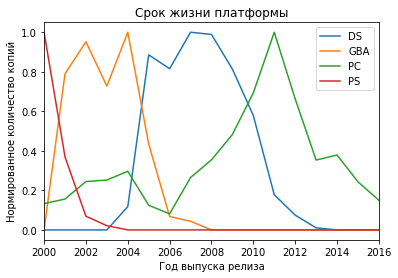

In [217]:
for platfоrm in list_10[:4]:
    dfq = pivot_T_normalized[platfоrm]
    dfq.plot(legend = platfоrm)
    plt.xlabel('Год выпуска релиза')
    plt.ylabel('Нормированное количество копий')
    plt.title('Срок жизни платформы')

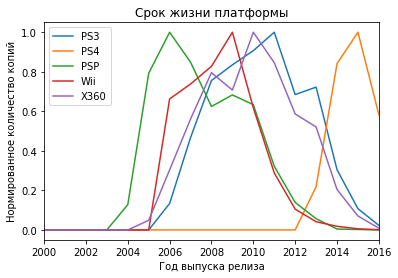

In [218]:
for platfоrm in list_10[5:]:
    dfq = pivot_T_normalized[platfоrm]
    dfq.plot(legend = platfоrm)
    plt.xlabel('Год выпуска релиза')
    plt.ylabel('Нормированное количество копий')
    plt.title('Срок жизни платформы')

**Вывод: Среднее время жизни платформы ранее можно было оценить как 10 лет (PS3). Сейчас её следует оценивать в 5 -6 лет. Дольше всех в прошлом продержалась PS3. Ей на смену в 2012 пришла PS4. Возможно, хотя платформа находится уже на спаде, ей удасться продержатьмся еще лет 5-6.**

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Ограничим выборку глубиною в 5 лет

In [219]:
df_10 = df.query('2011 <= year_of_release and year_of_release <= 2016')
len(df_10)

4022

In [220]:
popular_platform = df_10.groupby('platform').agg({'all_sales':'sum'}).sort_values(by='all_sales',ascending=False).head(10)
popular_platform['ratio'] = popular_platform['all_sales']/popular_platform['all_sales'].sum()
display(popular_platform)

# запомним смисок топ-10
list_of_top_platform = popular_platform.index.tolist()

,all_sales,ratio
platform,,
PS3,445569997,0.231507
X360,380380000,0.197636
PS4,314139997,0.163219
3DS,257809997,0.133952
XOne,159319999,0.082779
PC,97680000,0.050752
Wii,95019999,0.049370
WiiU,82190000,0.042704
PSV,53810000,0.027958


In [221]:
list_of_top_platform

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU', 'PSV', 'DS']

**Вывод: За период с 2011 по 2016 год лидировали следедующие платформы - 'PS3', 'X360', 'PS4', '3DS', 'XOne'.**

Расмотрим тенденции к росту (или к падению).

In [222]:
list_of_top_platform

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU', 'PSV', 'DS']

In [223]:
df_10_10 = df_10.query('platform in @list_of_top_platform').copy()
pivot_10_10 = df_10_10.pivot_table(index = 'platform', columns='year_of_release',values = 'all_sales', aggfunc = np.sum)
pivot_10_10 = pivot_10_10.query('index in @list_of_top_platform').copy()

In [224]:
pivot_10_10_T = pivot_10_10.T

In [225]:
list_actual = pivot_10_10.index.tolist()
list_actual

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

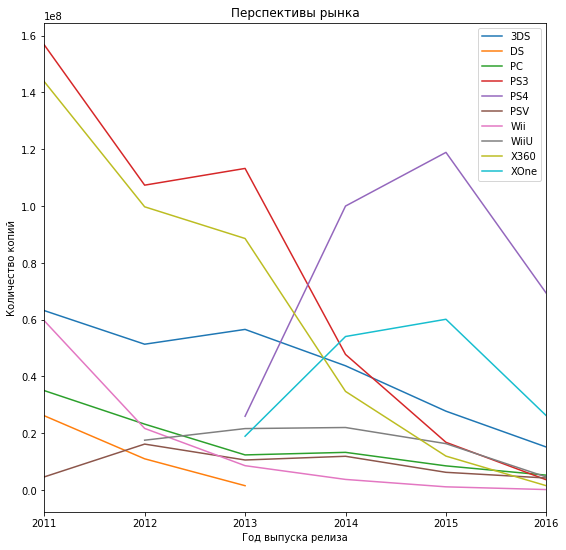

In [226]:
for platfоrm in list_actual[:10]:
    dfq = pivot_10_10_T[platfоrm]
    dfq.plot(legend = platfоrm, figsize=(9,9)) 
    plt.xlabel('Год выпуска релиза')
    plt.ylabel('Количество копий')
    plt.title('Перспективы рынка')

 **Вывод: Перспектив к росту c 2015 - нет. Рынок сворачивается. Доживают PS4, XOne.**
 **PS4 и XOne стартовали в 2012 году, соответсвенно есть ещё около 3-5 лет. Пик этих платформ приходится на 2015 год**

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


''

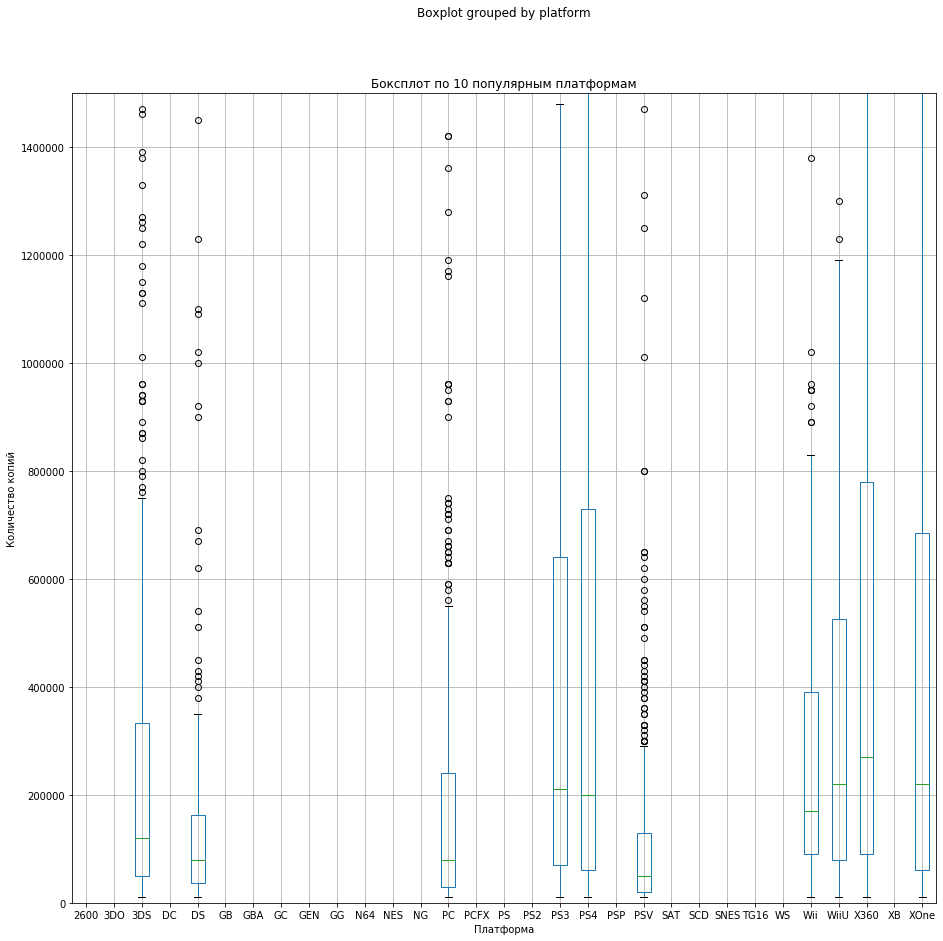

In [227]:
df_10_10.reset_index()
plot = df_10_10.boxplot(column='all_sales',by='platform',figsize=(15,15)).set_ylim(0, 1500000)
#plt.xlabel('')
plt.ylabel('Количество копий')
plt.xlabel('Платформа')
plt.title('Боксплот по 10 популярным платформам')
;

**Вывод: Ассиметричный боксплот показывает предварительны долгий рост рынка и затем резкий спад в количестве выпускаемых релизов игр. Кроме того, присутствуют сильные аномальные выбросы.**

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Возьмем в качестве подопытной платформы - PS3. Рассмотрим весь жизненный путь этой платформы от момента старта до угасания. От 2005 до 2016 года.

In [228]:
# не забудем выбросить из среза отсутствующие отзывы.
Single_popular_platform = 'PS3'
df_PLATFORM = df.query('platform == @Single_popular_platform and critic_score != -10 and user_score != - 10')
df_PLATFORM = df_PLATFORM.query('2005 <= year_of_release and year_of_release <= 2016')

На графике boxplot выше мы видели сильный шум и ассиметрию. Попробум очистить данные от выбросов.

In [229]:
# функция возвращает межквартильный размах для колонки в виде кортежа
def IQR(df,column):
    
    Q25 = df[column].quantile(0.25)                 
    Q75 = df[column].quantile(0.75) 
    MIN = df[column].min()
    MAX = df[column].max()
    
    IQR = Q75 - Q25
    
    left = Q25 - 1.5*IQR
    if left < MIN: left = MIN
    
    Right = Q75 + 1.5*IQR
    if Right > MAX: Right = MAX
     
    return (left, Right)

In [230]:
left, right = IQR(df_PLATFORM,'all_sales')

# убираем выбросы
df_PLATFORM = df_PLATFORM.query('@left <=all_sales and all_sales <=@right')

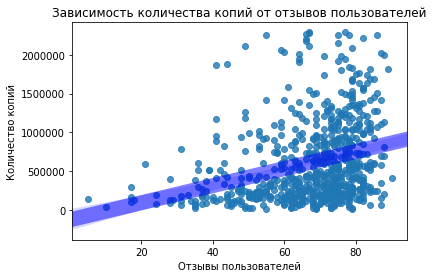

In [231]:
#plt.scatter(df_PLATFORM['user_score'], df_PLATFORM['all_sales'], alpha=0.5)
sns.regplot(x=df_PLATFORM['user_score'], y=df_PLATFORM['all_sales'], line_kws={"color":"b","alpha":0.5,"lw":15})
plt.ylabel('Количество копий')
plt.xlabel('Отзывы пользователей')
plt.title('Зависимость количества копий от отзывов пользователей')
plt.show()

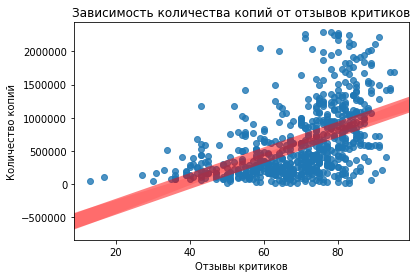

In [232]:
#plt.scatter(df_PLATFORM['critic_score'], df_PLATFORM['all_sales'], alpha=0.5)
sns.regplot(x=df_PLATFORM['critic_score'], y=df_PLATFORM['all_sales'], line_kws={"color":"r","alpha":0.5,"lw":15})
plt.ylabel('Количество копий')
plt.xlabel('Отзывы критиков')
plt.title('Зависимость количества копий от отзывов критиков')
plt.show()

In [233]:
corr = df_PLATFORM[['critic_score','user_score','all_sales','na_sales','eu_sales','jp_sales','other_sales']].corr()
corr.query('index=="critic_score" or index=="user_score"').style.background_gradient('coolwarm')

,critic_score,user_score,all_sales,na_sales,eu_sales,jp_sales,other_sales
critic_score,1,0.641236,0.507764,0.471719,0.398792,0.104147,0.429452
user_score,0.641236,1,0.295333,0.219341,0.225344,0.220125,0.232988


 **Вывод: Есть сильная положительная (0.6) корреляция между отзывами критиков и пользователей.**
**Есть небольшая положительная (0.5) корреляция между отзывами критиков и количеством копий релизов. И незначительная  корреляция (0.3) между отзывами пользователей и количеством копий.**

#### Соотнесем выводы с продажами игр на других платформах.

Уберем лишний шум.

In [234]:
left, right = IQR(df_PLATFORM,'all_sales')

# убираем выбросы
df_10_10_good = df_10_10.query('@left <=all_sales and all_sales <=@right')

corr = df_10_10_good[['critic_score','user_score','all_sales','na_sales','eu_sales','jp_sales','other_sales']].corr()
corr.query('index=="critic_score" or index=="user_score"').style.background_gradient('coolwarm')

,critic_score,user_score,all_sales,na_sales,eu_sales,jp_sales,other_sales
critic_score,1,0.841386,0.368637,0.348588,0.362998,-0.0343361,0.360637
user_score,0.841386,1,0.337097,0.322955,0.322303,-0.0255763,0.332285


**Вывод: На других платформах присутствует такая же зависимость. Причем, корреляция отзывов критиков и пользователей между собой становится сильной и ярко выраженной. А корреляция между самими отзывами и продажами (0.35) менее выраженная, чем та которую мы ранее видели на отдельной платформе PS3 (было 0.5 - для критиков).**

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Возьмем очищенный от выбросов датасет. 10 - популярных платформ, за последние 5 лет.

In [235]:
df_groupby_genre_10_10 = df_10_10_good.groupby(by='genre').agg({'all_sales':'sum'}).sort_values(by='\
all_sales', ascending=False) #.head(5).plot(kind='bar')
df_groupby_genre_10_10['ratio'] = df_groupby_genre_10_10['all_sales'] / df_10_10_good['all_sales'].sum()

In [236]:
# 5 - лидеров
head = df_groupby_genre_10_10.head(5)
head

,all_sales,ratio
genre,,
Action,326490000,0.327972
Shooter,129000000,0.129586
Role-Playing,118870000,0.119410
Sports,113730000,0.114246
Misc,77340000,0.077691


In [237]:
head.index.tolist()[:5]

['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc']

In [ ]:
# 5 - аутсайдеров
tail = df_groupby_genre_10_10.tail(6)
tail

In [ ]:
tail.index.tolist()[:5]

**Вывод:**

**Наиболее популярные жанры это: 'Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc'**

**Наименее популярные -'Fighting', 'Adventure', 'Simulation', 'Strategy', 'Puzzle'**

## Шаг 4. Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

- NA_sales — продажи в Северной Америке 
- EU_sales — продажи в Европе
- JP_sales — продажи в Японии

**Северная Америка**

In [259]:
# дублирующийся код оформим в функцию
def user_region_profile(df, column_groupby, column_agg):
    df_result = df.groupby(by=column_groupby).agg({column_agg:'sum'}).sort_values(by=column_agg,ascending=False).head(5) 
    df_result['ratio'] = df_result[column_agg] / df['all_sales'].sum()
    return df_result

In [260]:
# df_10 - датасет за десять лет по всем платформам
df_na = user_region_profile(df_10,'platform','na_sales')

In [261]:
df_na

,na_sales,ratio
platform,,
X360,226800000,0.116063
PS3,168259998,0.086106
PS4,108739999,0.055647
XOne,93120000,0.047653
3DS,82649998,0.042295


In [262]:
print('Популярные платформы в северной америке - ' + str(df_na.index.tolist()))

Популярные платформы в северной америке - ['X360', 'PS3', 'PS4', 'XOne', '3DS']


**Европа**

In [265]:
df_eu = user_region_profile(df_10,'platform','eu_sales')

In [266]:
df_eu

,eu_sales,ratio
platform,,
PS3,163099999,0.083465
PS4,141089998,0.072202
X360,117100000,0.059925
3DS,61269999,0.031354
PC,56700000,0.029016


In [267]:
df_eu.index.tolist()
print('Популярные платформы в европе - ' + str(df_eu.index.tolist()))

Популярные платформы в европе - ['PS3', 'PS4', 'X360', '3DS', 'PC']


**Япония**

In [269]:
df_jp = user_region_profile(df_10,'platform','jp_sales')

In [270]:
df_jp

,jp_sales,ratio
platform,,
3DS,100620000,0.051491
PS3,49390000,0.025275
PSP,24040000,0.012302
PSV,21840000,0.011176
PS4,15960000,0.008167


In [271]:
print('Популярные платформы в японии - ' + str(df_jp.index.tolist()))

Популярные платформы в японии - ['3DS', 'PS3', 'PSP', 'PSV', 'PS4']


**Прочие**

In [272]:
df_other = user_region_profile(df_10,'platform','other_sales')

In [273]:
df_other

,other_sales,ratio
platform,,
PS3,64820000,0.033171
PS4,48350000,0.024743
X360,33130000,0.016954
XOne,14270000,0.007303
3DS,13270000,0.006791


Построим общую диаграмму по долям рынка для всех регионов.

In [276]:
pie_na= df_na['na_sales'].sum() / df_10['all_sales'].sum()
pie_eu = df_eu['eu_sales'].sum() / df_10['all_sales'].sum()
pie_jp = df_jp['jp_sales'].sum() / df_10['all_sales'].sum()
pie_other = df_other['other_sales'].sum() / df_10['all_sales'].sum()

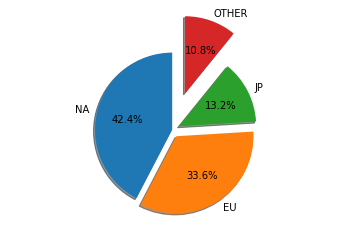

''

In [277]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'NA', 'EU', 'JP', 'OTHER'
sizes = [pie_na, pie_eu, pie_jp, pie_other] / (pie_na + pie_eu + pie_jp + pie_other)
explode = (0, 0.1, 0.1, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
;

**Выводы:**

**Североамериканский рынок является самым крупным из всех имеющихся и составляет 50% от всего рынка. далее идет европейский рынок 25% и замыкает японский - 13%.**

**На американском рынке лидируют 'X360', 'PS3', 'PS4', 'XOne', '3DS'** 

**На европейском - 'PS3', 'PS4', 'X360', '3DS', 'PC'.**

**На японском '3DS', 'PS3', 'PSP', 'PSV', 'PS4'.**


#### Самые популярные жанры (топ-5). Поясним разницу.

**Северная Америка**

In [ ]:
df_genre_NA_10_10 = df_10_10.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='\
na_sales',ascending=False).head(5) 
df_genre_NA_10_10['ratio'] = df_genre_NA_10_10['na_sales'] / df_10_10['all_sales'].sum()

In [ ]:
df_genre_NA_10_10

In [ ]:
df_genre_NA_10_10.index.tolist()

**Европа**

In [ ]:
df_genre_EU_10_10 = df_10_10.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='\
eu_sales',ascending=False).head(5) 
df_genre_EU_10_10['ratio'] = df_genre_EU_10_10['eu_sales'] / df_10_10['all_sales'].sum()

In [ ]:
df_genre_EU_10_10

In [ ]:
df_genre_EU_10_10.index.tolist()

**Япония**

In [ ]:
df_genre_JP_10_10 = df_10_10.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='\
jp_sales',ascending=False).head(5) 
df_genre_JP_10_10['ratio'] = df_genre_JP_10_10['jp_sales'] / df_10_10['all_sales'].sum()

In [ ]:
df_genre_JP_10_10

In [ ]:
df_genre_JP_10_10.index.tolist()

**Прочие**

In [ ]:
df_genre_OTHER_10_10 = df_10_10.groupby(by='genre').agg({'other_sales':'sum'}).sort_values(by='\
other_sales',ascending=False).head(5) 
df_genre_OTHER_10_10['ratio'] = df_genre_OTHER_10_10['other_sales'] / df_10_10['all_sales'].sum()

In [ ]:
df_genre_OTHER_10_10

Построим общую диаграмму по долям рынка для всех регионов.

In [ ]:
pie_NA = df_genre_NA_10_10['na_sales'].sum() / df_10_10['all_sales'].sum()
pie_EU = df_genre_EU_10_10['eu_sales'].sum() / df_10_10['all_sales'].sum()
pie_JP = df_genre_JP_10_10['jp_sales'].sum() / df_10_10['all_sales'].sum()
pie_OTHER = df_genre_OTHER_10_10['other_sales'].sum() / df_10_10['all_sales'].sum()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'NA', 'EU', 'JP', 'OTHER'
sizes = [pie_NA, pie_EU, pie_JP, pie_OTHER] / (pie_NA + pie_EU + pie_JP + pie_OTHER)
explode = (0, 0.1, 0.1, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
;

**Выводы:**

**Картина по общим долям рынка - не изменилась. Американский рынок сотставляет снова почти 50%, затем европейский 27% и замыкает японский - 13%**

На американском рынке лидируют жанры 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'. 

На европейском - 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'. 

На японском Role-Playing', 'Action', 'Misc', 'Platform', 'Shooter'.

Между американским и европейским рынком больше схожести в предпочтениях. На обоих рынках присутствуют одновременно Action, Sports, Shooter и Role-Playing. 

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
# убираем пустые рейтинги
df_rating_10_10 = df_10_10.query('rating != "no_rating"')

In [ ]:
df_rating_10_10.head(5)

In [ ]:
df_rating_10_10_NA = df_rating_10_10.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales',ascending=False) 

# нормируем вектор продаж в NA
normalized_NA = df_rating_10_10_NA / df_rating_10_10_NA['na_sales'].sum()

# смотрим
normalized_NA

In [ ]:
df_rating_10_10_EU = df_rating_10_10.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales',ascending=False) 

# нормируем вектор продаж в EU
normalized_EU = df_rating_10_10_EU / df_rating_10_10_EU['eu_sales'].sum()

normalized_EU

In [ ]:
df_rating_10_10_JP = df_rating_10_10.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales',ascending=False) 

# нормируем вектор продаж в JP
normalized_JP = df_rating_10_10_JP / df_rating_10_10_JP['jp_sales'].sum()

normalized_JP

In [ ]:
svod = normalized_NA.join(normalized_EU).join(normalized_JP)

In [ ]:
svod.style.background_gradient('coolwarm')

**Вывод: Для всех регионов наиболее продоваемыми являются копии с рейтингами E и Т. Наименее продаваемыми - EC и RP.**
**Индивидуальные различия для регионов есть, но они незначительны. Например, из общей картины выбивается для европы рейтинг - M.**


## Шаг 5. Проверяем гипотезы
<!-- 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<!-- Задайте самостоятельно пороговое значение alpha.
Поясните: Как вы сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.
 --> -->

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Сформулируем нулевую H0 и альтернативную гипотезу H1 следующим образом:

- H0 средние пользовательские рейтинги платформ Xbox One и PC не различаются
- H1 средние пользовательские рейтинги платформ Xbox One и PC различается

Для оценки гипотезы применим t-критерий стьюдента, предполагая при этом, что выборки независимы. Кроме того, у нас большой датасет с данными.


In [ ]:
# вспорминаем, что nan и tbd заменили на -1 b затем умножили на 10
df_score = df.query('user_score != -10')

In [ ]:
df_XOne = df_score.query('platform == "XOne"')

In [ ]:
df_XOne.head(5)

In [ ]:
len(df_XOne)

In [ ]:
df_PC = df_score.query('platform == "PC"')

In [ ]:
df_PC.head(5)

In [ ]:
len(df_PC)

In [ ]:
# посмотрим на распределение 
df_PC['user_score'].plot(kind='hist', bins=100)
plt.ylabel('Количество в выборке')
plt.xlabel('Рейтинг')
plt.title('Рейтинг на платформе PC')
;

In [ ]:
df_PC['user_score'].describe()

In [ ]:
# посмотрим на распределение 
df_XOne['user_score'].plot(kind='hist', bins=100)
plt.ylabel('Количество в выборке')
plt.xlabel('Рейтинг')
plt.title('Рейтинг на платформе XOne')
;

In [ ]:
df_XOne['user_score'].describe()

Построим boxplot для оценки симметричности распределения.

In [ ]:
list_PC = df_PC['user_score'].tolist()
list_XOne = df_XOne['user_score'].tolist()
new_df1 = pd.DataFrame(data={'user_score': list_PC, 'platform': ['PC']*len(list_PC)})
new_df2 = pd.DataFrame(data={'user_score': list_XOne, 'platform': ['XOne']*len(list_XOne)})

df_concat = pd.concat([new_df1, new_df2]).reset_index()

# вот такой код не работает!? можно раскомментарить и удивиться
# df_concat = df_score.query('platform == "XOne" or platform == "PC"')
# df_concat = df_concat[['platform','user_score']]
# df_concat = df_concat.reset_index()

df_concat.boxplot('user_score', by='platform', figsize=(5,5)) 
plt.xlabel('Платформа')
plt.ylabel('Рейтинг')
plt.title('Boxplot - рейтинг')
;

Много выбросов со стороны низких оценок.

Применим t-критерий стьюдента для сравнения двух выборок.

In [ ]:
alpha = 0.05

In [ ]:
results = st.ttest_ind(df_XOne['user_score'], df_PC['user_score'])

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

**Вывод: Средние пользовательские рейтинги платформ Xbox One и PC различается. Гипотеза H0 - отвергнута!**

**Рейтинги имеют статистически значимые различия.**

**Средний рейтинг по PC =70.624675, средний рейтинг по XOne = 65.214286**

### Гипотеза 2: Средние пользовательские рейтинги жанров Acton (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Сформулируем нулевую H0 и альтернативную гипотезу H1 следующим образом:

- H0 средние пользовательские рейтинги жанров Acton и Sports не различаются
- H1 средние пользовательские рейтинги жанров Acton и Sports различаются 

In [ ]:
df_score = df.query('user_score != -10')

In [ ]:
df_Acton = df_score.query('genre == "Action"')

In [ ]:
df_Acton.head(5)

In [ ]:
df_Sports = df_score.query('genre == "Sports"')

In [ ]:
df_Sports.head(5)

In [ ]:
# посмотрим на распределение 
df_Acton['user_score'].plot(kind='hist', bins=100)
plt.ylabel('Количество в выборке')
plt.xlabel('Рейтинг')
plt.title('Рейтинг жанра Acton')
;

In [ ]:
# посмотрим на распределение 
df_Sports['user_score'].plot(kind='hist', bins=100)
plt.ylabel('Количество в выборке')
plt.xlabel('Рейтинг')
plt.title('Рейтинг жанра Sports')
;

In [ ]:
df_Acton['user_score'].describe()

In [ ]:
df_Sports['user_score'].describe()

In [ ]:
alpha = 0.05

In [ ]:
results = st.ttest_ind(df_Acton['user_score'], df_Sports['user_score'])

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

**Вывод: Средние пользовательские рейтинги жанров Acton и Sports не различается. Гипотеза H0 - подтвержена!**

**Рейтинги не имеют статистически значимых различий.**

**Средний рейтинг по жанру Acton =70.540437, средний рейтинг по Sports = 69.611967**

## P.S. Экспериментальная оценка гипотез при помощи bootstrap технологии

**Определение bootstrap**

Бутстрэп (англ. bootstrap) в статистике — практический компьютерный метод исследования распределения статистик вероятностных распределений, основанный на многократной генерации выборок методом Монте-Карло на базе имеющейся выборки. Позволяет просто и быстро оценивать самые разные статистики (доверительные интервалы, дисперсию, корреляцию и так далее) для сложных моделей. https://ru.wikipedia.org/wiki/%D0%91%D1%83%D1%82%D1%81%D1%82%D1%80%D1%8D%D0%BF_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)

### Оценка гипотезы №1 при помощи bootstrap технологии.

*Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

In [ ]:
# убираем выбросы

def cleaner_df(df, column_name, k):
    range_Q1_Q3 = df[column_name].quantile([0.25,0.75]).tolist()
    Q1 = range_Q1_Q3[0]
    Q3 = range_Q1_Q3[1]
    left = Q1 - (Q3-Q1) * k
    Right = Q3 + (Q3-Q1) * k
    sql = '@left <= '+ column_name + ' and ' + column_name + ' <= @Right'
    return df.query(sql)

In [ ]:
df_1 = df_PC.copy()
df_2 = df_XOne.copy()

column_name = 'user_score'
    
df_1 = cleaner_df(df_1,column_name,0.5)
df_2 = cleaner_df(df_2,column_name,0.5)

In [ ]:
# количество итераций метода
bootstrap_len = 10000

# массив для накопления разницы между выборками
mean_difference= []
median_difference= []

len_1 = len(df_1)
len_2 = len(df_2)

for i in range(bootstrap_len):
    # генерация выборки 1
    bootstrap_sample_1 = df_1[column_name].sample(n=len_1, replace=True)
    # среднее 1
    mean_1 = bootstrap_sample_1.mean()
    median_1 = bootstrap_sample_1.median()
    # генерация выборки 2
    bootstrap_sample_2 = df_2[column_name].sample(n=len_1, replace=True)
    # среднее 2
    mean_2 = bootstrap_sample_2.mean()
    median_2 = bootstrap_sample_2.median()
    # накопление разности среднего и медианы по 1 и 2 выборкам
    mean_difference.append(mean_1 - mean_2) 
    median_difference.append(median_1 - median_2) 


In [ ]:
pd_series_mean = pd.Series(mean_difference)
pd_series_mean.plot(kind='hist', bins=50)
plt.ylabel('Количество в выборке')
plt.xlabel('Разность средних значений (bootstrap)')
plt.title('Разность средних значений (bootstrap)')

In [ ]:
diff_mean = pd_series_mean.mean()
print('Разница между средними значениями = {:.2f}'.format(diff_mean))

In [ ]:
pd_series_mean.describe()

In [ ]:
# разница средних деленная на среднюю по 1 и 2
print(diff_mean / df_1[column_name].mean())
print(diff_mean / df_2[column_name].mean())

**Вывод: Разница средних отнесенная к среднему приблизительно 10%. Подтвердился ранее сделвнный вывод по t -критерию. Средние рейтинги по платформам PC и XOne - различаются.**

## Оценка гипотезы №2 при помощи bootstrap технологии.

*Гипотеза: Средние пользовательские рейтинги жанров Acton (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные*

In [ ]:
# убираем выбросы

df_1 = df_Acton.copy()
df_2 = df_Sports.copy()

column_name = 'user_score'
    
df_1 = cleaner_df(df_1,column_name,0.5)
df_2 = cleaner_df(df_2,column_name,0.5)

In [ ]:
# количество итераций метода
bootstrap_len = 10000

# массив для накопления разницы между выборками
mean_difference= []
median_difference= []

len_1 = len(df_1)
len_2 = len(df_2)

for i in range(bootstrap_len):
    # генерация выборки 1
    bootstrap_sample_1 = df_1[column_name].sample(n=len_1, replace=True)
    # среднее 1
    mean_1 = bootstrap_sample_1.mean()
    median_1 = bootstrap_sample_1.median()
    # генерация выборки 2
    bootstrap_sample_2 = df_2[column_name].sample(n=len_1, replace=True)
    # среднее 2
    mean_2 = bootstrap_sample_2.mean()
    median_2 = bootstrap_sample_2.median()
    # накопление разности среднего и медианы по 1 и 2 выборкам
    mean_difference.append(mean_1 - mean_2) 
    median_difference.append(median_1 - median_2) 


In [ ]:
pd_series_mean = pd.Series(mean_difference)
pd_series_mean.plot(kind='hist', bins=50)
plt.ylabel('Количество в выборке')
plt.xlabel('Разность средних значений (bootstrap)')
plt.title('Разность средних значений (bootstrap)')
;

In [ ]:
diff_mean = pd_series_mean.mean()
print('Разница между средними значениями = {:.2f} руб'.format(diff_mean))

In [ ]:
pd_series_mean.describe()

In [ ]:
# разница средних деленная на среднюю по 1 и 2
print(diff_mean / df_1[column_name].mean())
print(diff_mean / df_2[column_name].mean())

**Вывод: Средние рейтинги для жанров Acton и Sports не различаются (разность средних отнесенная к самим средним равна 0.2%). Можно считать, что выводы по bootstrap с ранее сделвнным выводом по t -критерию совпадают.**

# Шаг 5. Общии выводы

**Главный вывод состоит в том, что рынок игровых приставок доживает свои последнии годы.**

**Платформы XOne и PS4 - последние из имеющих перспективы.**

- Начиная с 2008 года ежегодное падение составляет от -1.9% в 2009 году до -106.2% в 2016. (в 2014  было -9.0% в 2015 году было падение -23%)

- Время жизни игровой платформы удалось оценить в максимум 10 лет. Поскольку рынок сворачивается, то и время жизни укорачивается до 5-8 лет. 
- XOne и  PS4 стартовали в 2012 году и прошли пик своего роста в 2015 году, соответсвенно есть ещё около 3-5 лет до полного исчерпания пользовательского интереса. **XOne и  PS4 - платформы на которые следует обратить внимание.**
- На примере наиболее долгоживущей платформы, а именно PS3 - был разобран вопрос о влиянии оценок критиков и пользователей на продажи. Удалось выяснить, что есть сильная положительная (0.6) корреляция между отзывами критиков и пользователей. То есть критики и пользователи оценивают платформы почти одинаково. Есть небольшая положительная (0.52) корреляция между отзывами критиков и количеством копий релизов. И менее выраженная корреляция (0.32) между отзывами пользователей и количеством проданных копий. То есть, получается что нужно ориентироваться на оценки критиков, как более объективные. Возможно - опросы пользователей проводятся некорректно.
- Наиболее популярные жанры это: 'Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc'
- Наименее популярные -'Fighting', 'Adventure', 'Simulation', 'Strategy', 'Puzzle'

**География спроса**
- Североамериканский рынок является самым крупным из всех имеющихся и составляет 50% от всего рынка. Далее идет европейский рынок 25% и замыкает японский - 13%.

Платформы:

- На американском рынке лидируют 'X360', 'PS3', 'PS4', 'XOne', '3DS'.
- На европейском - 'PS3', 'PS4', 'X360', '3DS', 'PC'.
- На японском '3DS', 'PS3', 'PSV', 'PS4', 'WiiU'.

Жанры:

- На американском рынке лидируют жанры 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'.
- На европейском - 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'.
- На японском Role-Playing', 'Action', 'Misc', 'Platform', 'Shooter'.

Между американским и европейским рынком больше схожести в предпочтениях. На обоих рынках присутствуют одновременно Action, Sports, Shooter и Role-Playing.


**Рейтинги ESRB**

Для всех регионов **наиболее** продоваемыми являются копии с рейтингами **E и Т**. **Наименее** продаваемыми - **EC и RP**. Индивидуальные различия для регионов есть, но они незначительны. Например, из общей картины выбивается для европы рейтинг - M.

**Были проверены предложенные гипотезы:**
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
  
  Гипотеза отвергнута. Рейтинги платформ статистически различаются.
  
  
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
  
  Гипотеза отвергнута. Рейтинги жанров статистически не различаются.
   
  